# CAMELS MultiField dataset

Previously, we were not very successful at making use of the CMD. This was purely problem with my use of the syntax for loading datasets. This time, the problem has been resolved and we are able to properly load the CAMELS MultiField dataset.

This example is an attempt to make a CNN for classification of IllustrisTNG data with respect to $\Omega_m$, a cosmological parameter which represents fraction of matter in the Universe

## Load in the dataset

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import astro_datasets
import matplotlib.pyplot as plt
import numpy as np

C:\Users\vovaz\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
(cmd_train, cmd_test, cmd_val), info = tfds.load(name='cmd', 
                                                 split=['train[0%:90%]','train[90%:95%]','train[95%:100%]'], 
                                                 with_info=True, 
                                                 as_supervised=True, 
                                                 builder_kwargs={'simulation': 'Nbody_IllustrisTNG', 'field': 'Mtot', 
                                                 'parameters': ['omegam']})

In [3]:
(simba_train, simba_test, simba_val), info_simba = tfds.load(name='cmd', 
                                                 split=['train[0%:90%]','train[90%:95%]','train[95%:100%]'], 
                                                 with_info=True, 
                                                 as_supervised=True, 
                                                 builder_kwargs={'simulation': 'Nbody_SIMBA', 'field': 'Mtot', 
                                                 'parameters': ['omegam']})

Load the SIMBA simulation as well, to compare testing losses on the final model

### Preprocess data

In [4]:
btch_size = 128

In [5]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float64`."""
  return tf.cast(image, tf.float64) / 255., label

cmd_train = cmd_train.map(normalize_img)
cmd_train = cmd_train.cache() # As you fit the dataset in memory, cache it before shuffling for a better performance.
                              # Note: Random transformations should be applied after caching.
cmd_train = cmd_train.shuffle(buffer_size=len(cmd_train))
cmd_train = cmd_train.batch(btch_size) # Batch elements of the dataset after shuffling to get unique batches at each epoch.
cmd_train = cmd_train.prefetch(tf.data.AUTOTUNE) # It is good practice to end the pipeline by prefetching for performance.



cmd_test = cmd_test.map(normalize_img)
cmd_test = cmd_test.batch(btch_size) 
cmd_test = cmd_test.cache()
cmd_test = cmd_test.prefetch(tf.data.AUTOTUNE)



cmd_val = cmd_val.map(normalize_img)
cmd_val = cmd_val.batch(btch_size) 
cmd_val = cmd_val.cache()
cmd_val = cmd_val.prefetch(tf.data.AUTOTUNE)

In [6]:
simba_train = simba_train.map(normalize_img)
simba_train = simba_train.cache() # As you fit the dataset in memory, cache it before shuffling for a better performance.
                              # Note: Random transformations should be applied after caching.
simba_train = simba_train.shuffle(buffer_size=len(simba_train))
simba_train = simba_train.batch(btch_size) # Batch elements of the dataset after shuffling to get unique batches at each epoch.
simba_train = simba_train.prefetch(tf.data.AUTOTUNE) # It is good practice to end the pipeline by prefetching for performance.



simba_test = simba_test.map(normalize_img)
simba_test = simba_test.batch(btch_size) 
simba_test = simba_test.cache()
simba_test = simba_test.prefetch(tf.data.AUTOTUNE)



simba_val = simba_val.map(normalize_img)
simba_val = simba_val.batch(btch_size) 
simba_val = simba_val.cache()
simba_val = simba_val.prefetch(tf.data.AUTOTUNE)

In [7]:
print("Train set size: ", len(cmd_train)*btch_size)
print("Test set size: ", len(cmd_test)*btch_size)
print("Validation set size: ", len(cmd_val)*btch_size)

Train set size:  13568
Test set size:  768
Validation set size:  768


In [8]:
print("Train set size: ", len(simba_train)*btch_size)
print("Test set size: ", len(simba_test)*btch_size)
print("Validation set size: ", len(simba_val)*btch_size)

Train set size:  13568
Test set size:  768
Validation set size:  768


In [9]:
info

tfds.core.DatasetInfo(
    name='cmd',
    full_name='cmd/1.0.4',
    description="""
    The CAMELS Multifield dataset consists of 3 groups indicating the type of simulation used to create the data.IllustrisTNG are magneto-hydrodynamic simulations.SIMBA are hydrodynamic simulations.There are corresponding N-body simulations for each(magneto-)hydrodynamic simulation.
    """,
    homepage='https://camels-multifield-dataset.readthedocs.io/en/latest/index.html',
    data_path='C:\\Users\\vovaz\\tensorflow_datasets\\Nbody_IllustrisTNG_Mtot_omegam\\cmd\\1.0.4',
    file_format=tfrecord,
    download_size=3.66 GiB,
    dataset_size=3.66 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(256, 256, 1), dtype=tf.float32),
        'label': Tensor(shape=(1,), dtype=tf.float32),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=15000, num_shards=32>,
    },
    citation="""""",
)

In [10]:
info_simba

tfds.core.DatasetInfo(
    name='cmd',
    full_name='cmd/1.0.4',
    description="""
    The CAMELS Multifield dataset consists of 3 groups indicating the type of simulation used to create the data.IllustrisTNG are magneto-hydrodynamic simulations.SIMBA are hydrodynamic simulations.There are corresponding N-body simulations for each(magneto-)hydrodynamic simulation.
    """,
    homepage='https://camels-multifield-dataset.readthedocs.io/en/latest/index.html',
    data_path='C:\\Users\\vovaz\\tensorflow_datasets\\Nbody_SIMBA_Mtot_omegam\\cmd\\1.0.4',
    file_format=tfrecord,
    download_size=3.66 GiB,
    dataset_size=3.66 GiB,
    features=FeaturesDict({
        'image': Tensor(shape=(256, 256, 1), dtype=tf.float32),
        'label': Tensor(shape=(1,), dtype=tf.float32),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=15000, num_shards=32>,
    },
    citation="""""",
)

Visualize the datasets to have some visual understanding of the data

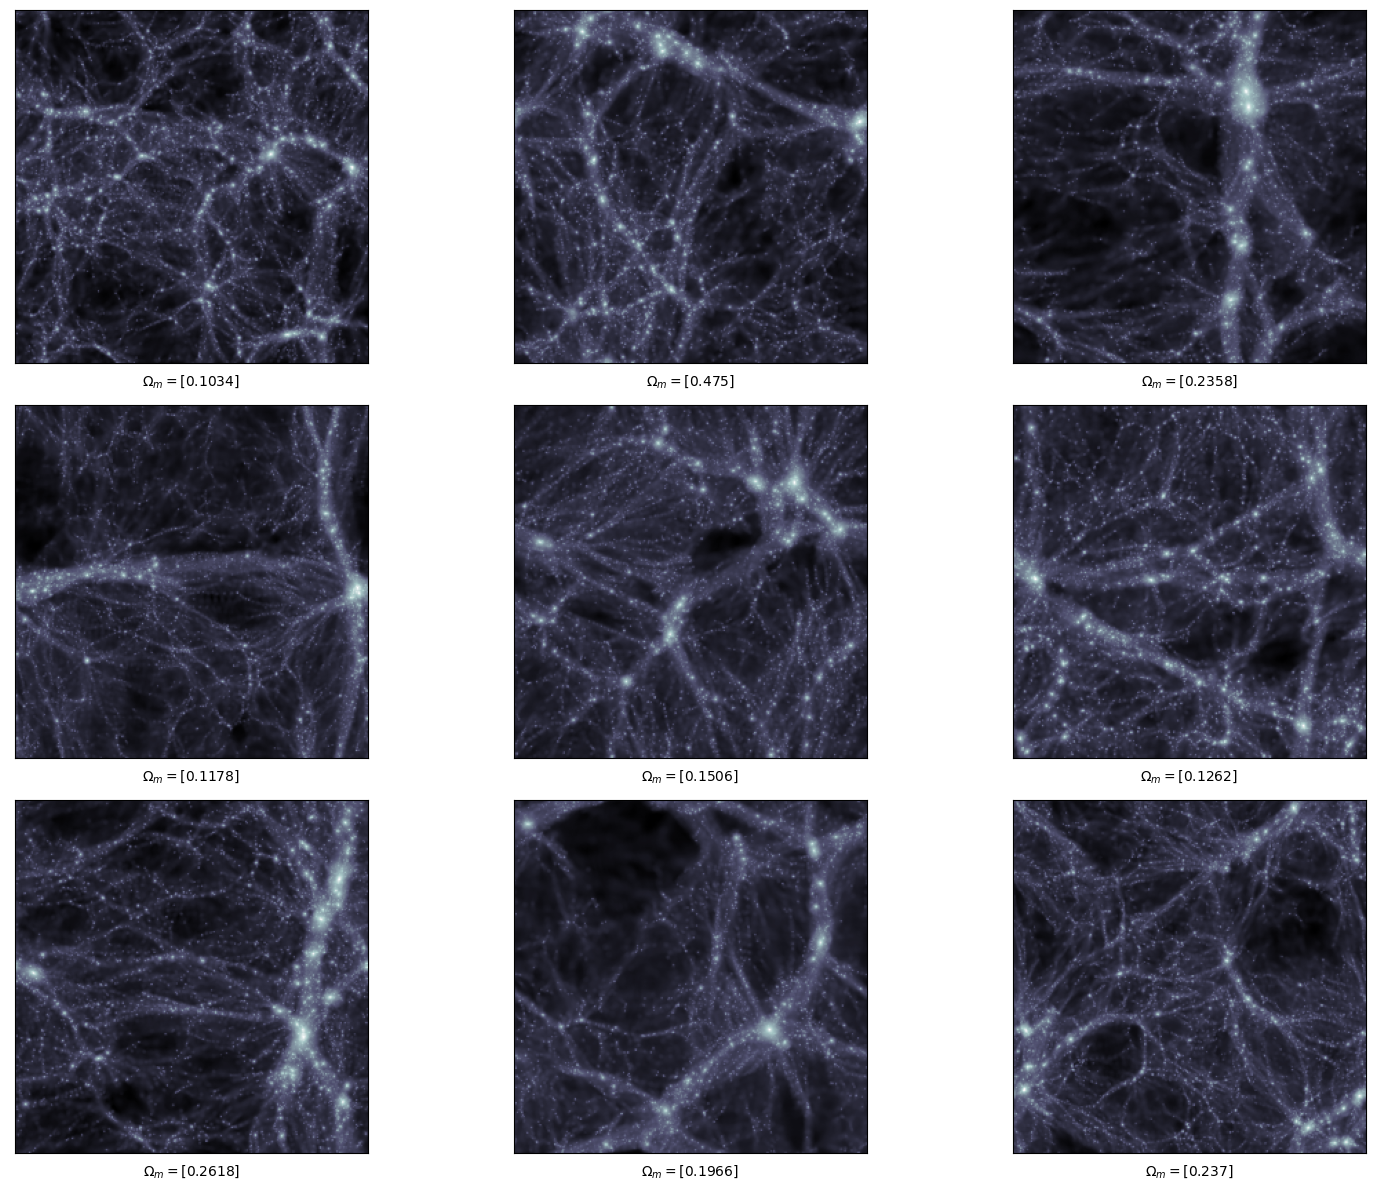

In [11]:
fig = plt.figure(figsize=(16,12))

samples = cmd_train.take(9)

i=1

for images, labels in samples:

    ax = fig.add_subplot(3,3,i)

    numpy_image = images.numpy()
    numpy_label = labels.numpy()


    img_norm = tf.math.log(numpy_image)
    lbl = str('$\Omega_m = {}$'.format(numpy_label[i-1]))

    i+=1
    
    ax.imshow(img_norm[i-1], cmap='bone')
    ax.set_xlabel(lbl)
    ax.set_xticks([])
    ax.set_yticks([])


plt.tight_layout()
plt.show()

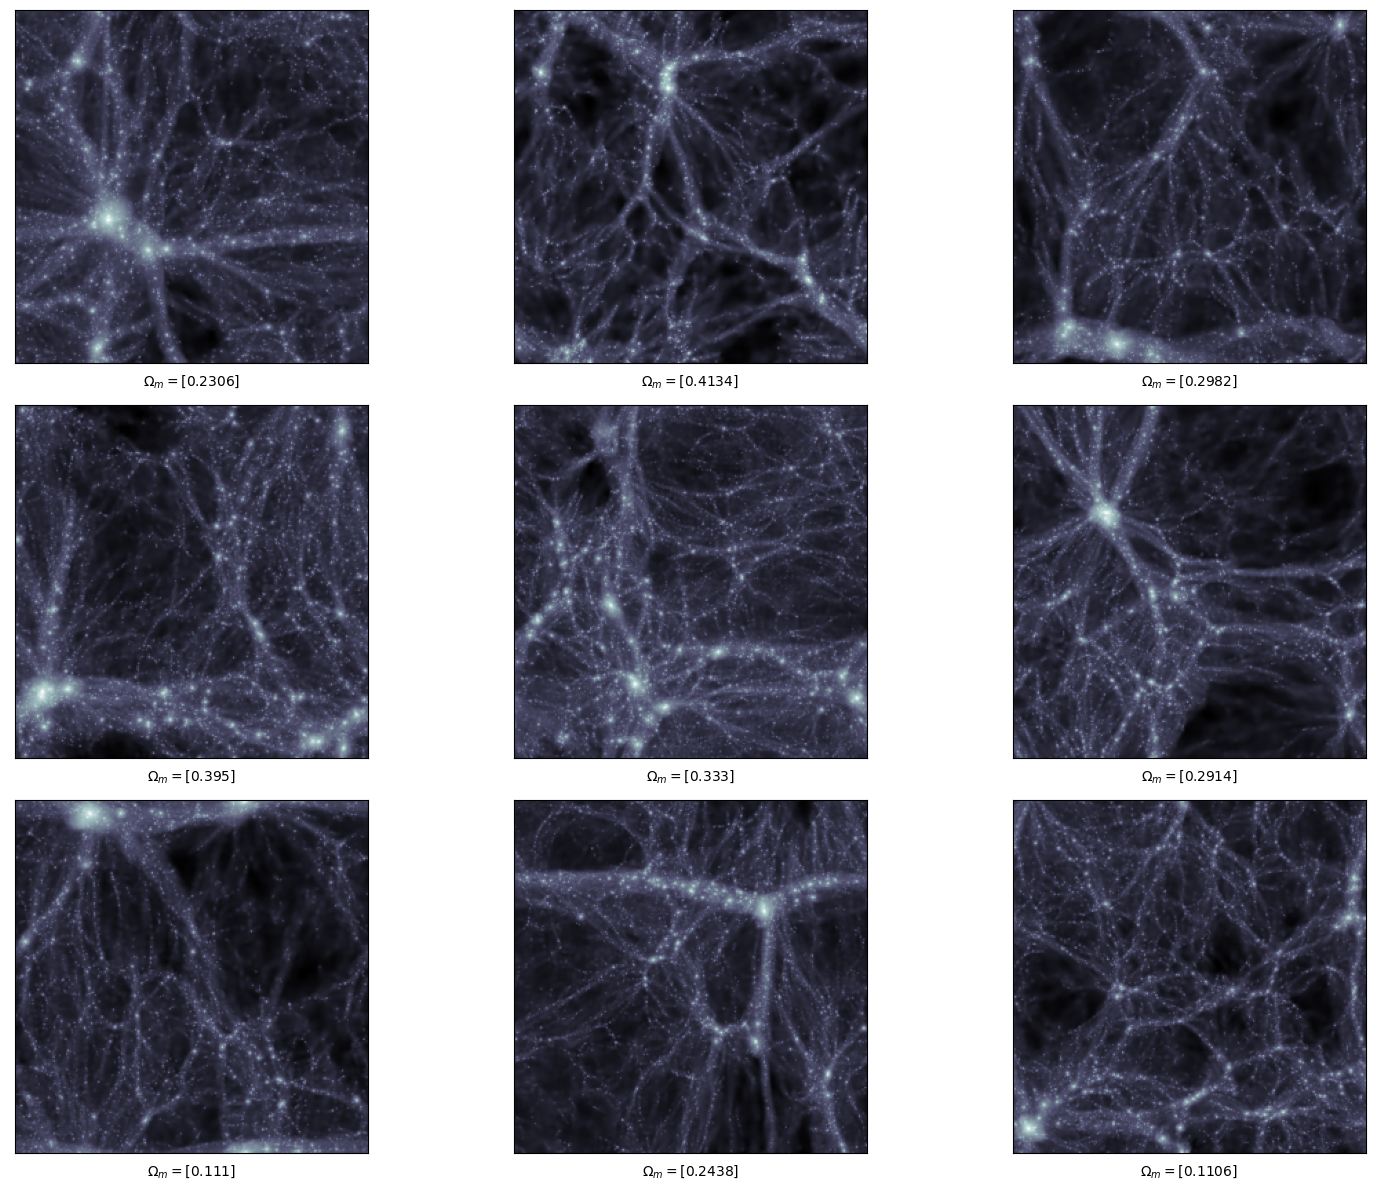

In [12]:
fig = plt.figure(figsize=(16,12))

samples = simba_train.take(9)

i=1

for images, labels in samples:

    ax = fig.add_subplot(3,3,i)

    numpy_image = images.numpy()
    numpy_label = labels.numpy()


    img_norm = tf.math.log(numpy_image)
    lbl = str('$\Omega_m = {}$'.format(numpy_label[i-1]))

    i+=1
    
    ax.imshow(img_norm[i-1], cmap='bone')
    ax.set_xlabel(lbl)
    ax.set_xticks([])
    ax.set_yticks([])


plt.tight_layout()
plt.show()

The simulation used for for this example, Illustris TNG & SIMBA, uses the state of art code to simulate galaxy formation based on cosmological observations of the Universe.

This exact simulation focuses on $M_{tot}$ field, total mass of the universe, labeling data based on $\Omega_m$ cosmological parameter, which indicates a fraction of total mass in the Universe for given n-body simulation

Lets now define a DL model to classify for different $\Omega_m$ values between simulations

## CNN model

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

In [14]:
cmd_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [15]:
camels_cnn = tf.keras.models.Sequential()

Note that it is a regression problem now, not classification.

Hence, output layer will only have one node and loss function will be MeanSquareError

In [16]:
camels_cnn.add(Dropout(rate=0.5, input_shape=(256, 256, 1)))

camels_cnn.add(BatchNormalization()) # !!! --- CRUCIAL --- !!!

#camels_cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
#camels_cnn.add(MaxPooling2D((3,3)))

camels_cnn.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
camels_cnn.add(MaxPooling2D((3,3)))


camels_cnn.add(Flatten())

# feature interpretation layer
# camels_cnn.add(Dense(64))

camels_cnn.add(Dense(32))

camels_cnn.add(Dropout(rate=0.5))

# classification layer
camels_cnn.add(Dense(1))

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [18]:
camels_cnn.compile(optimizer=opt,
                   loss=tf.keras.losses.MeanAbsoluteError(),
                   metrics=['mse'])

# MSE loss caused exploding gradient (loss: nan), so switch to MAE

In [19]:
hist_cnn = camels_cnn.fit(cmd_train, validation_data=cmd_val, epochs=5)

Epoch 1/5
106/106 [==============================] - 141s 1s/step - loss: 4.7531 - mse: 76.9643 - val_loss: 0.3724 - val_mse: 0.2586
Epoch 2/5
106/106 [==============================] - 136s 1s/step - loss: 0.5877 - mse: 1.1369 - val_loss: 0.2350 - val_mse: 0.0684
Epoch 3/5
106/106 [==============================] - 135s 1s/step - loss: 0.1381 - mse: 0.0396 - val_loss: 0.1409 - val_mse: 0.0294
Epoch 4/5
106/106 [==============================] - 131s 1s/step - loss: 0.0906 - mse: 0.0143 - val_loss: 0.1184 - val_mse: 0.0207
Epoch 5/5
106/106 [==============================] - 131s 1s/step - loss: 0.0812 - mse: 0.0111 - val_loss: 0.1166 - val_mse: 0.0205


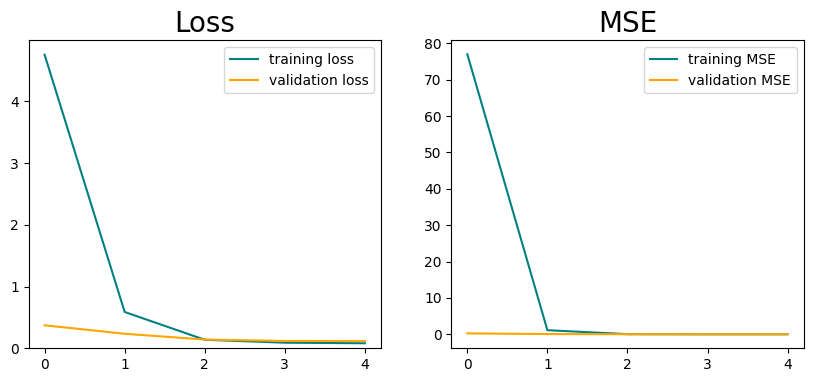

In [20]:
fig1 = plt.figure(figsize = (10,4))

ax2 = fig1.add_subplot(121)
ax2.plot(hist_cnn.history['loss'], color='teal', label='training loss')
ax2.plot(hist_cnn.history['val_loss'], color='orange', label='validation loss')
ax2.set_title('Loss', fontsize=20)
ax2.set_ylim(bottom=0)
ax2.legend(loc="best")

ax3 = fig1.add_subplot(122)
ax3.plot(hist_cnn.history['mse'], color='teal', label='training MSE')
ax3.plot(hist_cnn.history['val_mse'], color='orange', label='validation MSE')
ax3.set_title('MSE', fontsize=20)
ax3.legend(loc="best")

plt.show()

Now need to evaluate the model

First, try to evaluate it on the IllustrisTNG test dataset

In [21]:
camels_cnn.evaluate(cmd_test)

6/6 [==============================] - 1s 192ms/step - loss: 0.1140 - mse: 0.0199


[0.11401129513978958, 0.019917169585824013]

Now, try it with the SIMBA one

In [22]:
camels_cnn.evaluate(simba_train)

106/106 [==============================] - 22s 209ms/step - loss: 0.1150 - mse: 0.0200


[0.11497257649898529, 0.020009923726320267]

In [23]:
camels_cnn.evaluate(simba_test)

6/6 [==============================] - 1s 195ms/step - loss: 0.1135 - mse: 0.0195


[0.11353633552789688, 0.0194888673722744]

In [28]:
simba_test.as_numpy_iterator().next()[1]

array([[0.2174],
       [0.3314],
       [0.2166],
       [0.149 ],
       [0.1538],
       [0.2942],
       [0.3006],
       [0.2606],
       [0.1394],
       [0.1382],
       [0.4378],
       [0.4294],
       [0.1682],
       [0.4974],
       [0.1442],
       [0.2766],
       [0.1514],
       [0.3158],
       [0.3526],
       [0.4446],
       [0.2394],
       [0.4458],
       [0.321 ],
       [0.4826],
       [0.1318],
       [0.3594],
       [0.1702],
       [0.2658],
       [0.465 ],
       [0.105 ],
       [0.1522],
       [0.4318],
       [0.3562],
       [0.2634],
       [0.1858],
       [0.2582],
       [0.3846],
       [0.347 ],
       [0.4134],
       [0.1834],
       [0.2018],
       [0.1922],
       [0.1378],
       [0.1946],
       [0.3242],
       [0.2246],
       [0.3986],
       [0.4402],
       [0.4546],
       [0.2642],
       [0.327 ],
       [0.303 ],
       [0.1122],
       [0.4514],
       [0.343 ],
       [0.3862],
       [0.3426],
       [0.4534],
       [0.4142

In [29]:

yhat = camels_cnn.predict(simba_test.take(1))

print('prediction: {}'.format(str(yhat)))

1/1 [==============================] - 0s 215ms/step
prediction: [[0.2139208 ]
 [0.21110034]
 [0.18979736]
 [0.19541454]
 [0.19220294]
 [0.22147553]
 [0.23078528]
 [0.21485938]
 [0.18617672]
 [0.19866648]
 [0.22878939]
 [0.19634973]
 [0.18149543]
 [0.20108357]
 [0.2009279 ]
 [0.22172844]
 [0.16193259]
 [0.21939747]
 [0.20455012]
 [0.19221613]
 [0.21352662]
 [0.21894379]
 [0.22205493]
 [0.22583333]
 [0.20688558]
 [0.21183167]
 [0.19330731]
 [0.19604819]
 [0.20282634]
 [0.1850556 ]
 [0.20014054]
 [0.2205854 ]
 [0.20659882]
 [0.2029601 ]
 [0.18584068]
 [0.22817807]
 [0.22936046]
 [0.21903825]
 [0.22172889]
 [0.20749384]
 [0.20521912]
 [0.22821033]
 [0.21927339]
 [0.2053897 ]
 [0.20435499]
 [0.22452813]
 [0.20247711]
 [0.21239246]
 [0.21635716]
 [0.19449514]
 [0.22695754]
 [0.20256121]
 [0.18132006]
 [0.22484492]
 [0.22124541]
 [0.22009224]
 [0.20934817]
 [0.2164036 ]
 [0.21047562]
 [0.22787285]
 [0.22186173]
 [0.20300514]
 [0.18997544]
 [0.22663203]
 [0.20434237]
 [0.21630114]
 [0.2138472

In [31]:
diff = simba_test.as_numpy_iterator().next()[1] - yhat
diff

array([[ 3.47919762e-03],
       [ 1.20299667e-01],
       [ 2.68026441e-02],
       [-4.64145392e-02],
       [-3.84029448e-02],
       [ 7.27244765e-02],
       [ 6.98147118e-02],
       [ 4.57406193e-02],
       [-4.67767119e-02],
       [-6.04664832e-02],
       [ 2.09010601e-01],
       [ 2.33050272e-01],
       [-1.32954270e-02],
       [ 2.96316415e-01],
       [-5.67279011e-02],
       [ 5.48715591e-02],
       [-1.05325878e-02],
       [ 9.64025408e-02],
       [ 1.48049891e-01],
       [ 2.52383858e-01],
       [ 2.58733779e-02],
       [ 2.26856217e-01],
       [ 9.89450812e-02],
       [ 2.56766677e-01],
       [-7.50855803e-02],
       [ 1.47568330e-01],
       [-2.31073052e-02],
       [ 6.97518140e-02],
       [ 2.62173653e-01],
       [-8.00556019e-02],
       [-4.79405373e-02],
       [ 2.11214602e-01],
       [ 1.49601191e-01],
       [ 6.04398847e-02],
       [-4.06801701e-05],
       [ 3.00219208e-02],
       [ 1.55239552e-01],
       [ 1.27961755e-01],
       [ 1.9

## Conclusion

It can be seen that the model works fine for both simulations, while in reality one could expect the model to perform a bit more poorly on the simulation it has never seen during training.

Examining this behaviour is the next step of the project

## Problems Encountered

The problem we encountered with trying to model a cnn for regression problem is that it resulted in $loss: nan$ and zero accuracy. Possible solutions to the problem (and the ones we applied) are listed here:

https://stackoverflow.com/questions/37232782/nan-loss-when-training-regression-network

https://datascience.stackexchange.com/questions/68331/keras-sequential-model-returns-loss-nan

Update: Solution was to add BatchNormalisation after the input since I did not normalize data manually. Also, 'Accuracy' is Classification metric. For regression use either 'MSE' or 'MAE'